In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston

In [3]:
# scikit-learnがデフォルトで持っているボストンの住宅価格データ
boston = load_boston()

# 特徴量とターゲット変数の関係

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 特徴量別にターゲット変数であるPriceとの関係性を確認する
fig = plt.figure(figsize=(20,20))
for num, col in enumerate(boston['feature_names']):
    ax = fig.add_subplot(4,4,num+1)
    ax.scatter(boston['data'][:, num], boston['target'])
    ax.set_title(col)

## MARSと線形回帰の比較

In [5]:
import pyearth
from sklearn.linear_model import LinearRegression

# ターゲット変数、説明変数を抽出
y = boston['target']
X = boston['data'][:, -1].reshape(-1,1)

LR = LinearRegression()
MARS = pyearth.Earth()

LR.fit(X, y)
MARS.fit(X, y)

/usr/local/lib/python3.6/site-packages/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.6/site-packages/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth()

In [6]:
print(MARS.summary())

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      11.9581      
h(x0-6.12)      Yes     None         
h(6.12-x0)      No      4.11806      
h(x0-22.74)     Yes     None         
h(22.74-x0)     No      0.87503      
x0              Yes     None         
-------------------------------------
MSE: 26.4084, GCV: 27.0460, RSQ: 0.6872, GRSQ: 0.6809


In [7]:
# モデル可視化用のx軸
X_ = np.linspace(int(X.reshape(-1).min()), int(X.reshape(-1).max()), 100).reshape(-1,1)

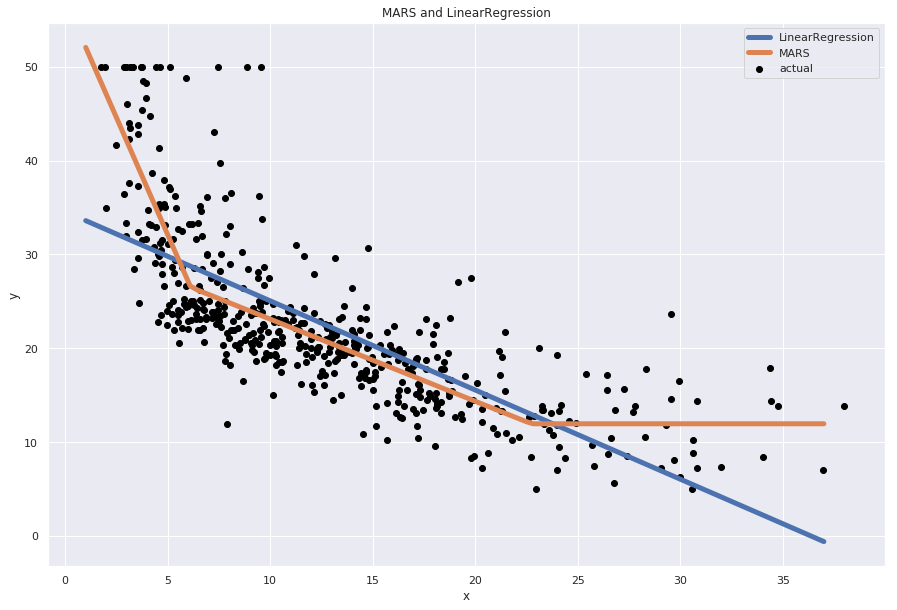

In [8]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.plot(X_, LR.predict(X_), label='LinearRegression', linewidth=5)
ax.plot(X_, MARS.predict(X_), label='MARS', linewidth=5)
ax.scatter(X.reshape(-1), y, label='actual', color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.set_title('MARS and LinearRegression')
plt.show()

## ヒンジ関数

In [9]:
def hinge(x: np.array, c: int, mirror_f=False):
    """
    ヒンジ関数の一例
    """
    if mirror_f:
        return np.where(x-c>0, x-c, 0)
    else:
        return np.where(c-x>0, c-x, 0)

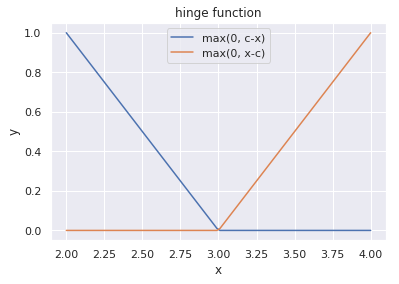

In [10]:
x = np.linspace(2.0, 4.0, 100)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, hinge(x=x, c=3), label='max(0, c-x)')
ax.plot(x, hinge(x=x, c=3, mirror_f=True), label='max(0, x-c)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.set_title('hinge function')
plt.show()